Team 2.

Notes from Michael Lamoureux.

Let's do a quick example of how to make an ODE solver for their type of system.

They have a bunch of variables $c_1, c_2, \ldots, c_9$ and $e_1, e_2$ etc, and a system of ODEs to connect them all together.

It helps in the notation for the code to rename the variables to something consistent, like $c_1$ through to $c_{15}$ or whatever. The ODE can be represented as working on the column vector of coefficients $\mathbf{c} = [c_1, c_2, \ldots, c_{15}]^t.$ We write the ODE as
$$\frac{d}{dt} \mathbf{c} = A\mathbf{c} + (B\mathbf{c})\mathbf{c}.$$
Here, $A$ is the matrix of coefficients for the linear part.

$B$ is a bit more complicated. It is a multidimentional array, representing a matrix of matrices, holding the coefficients for the quadratic part. In Python, it is easy to work with multidimensional arrays, so let's just do it. 


The advantage of this notation is that for Python or Matlab, you just have to set up the matrices correctly, then call the ode code directly.

As an example, suppose we had just 3 variables $c_1,c_2,c_3$ and the ODE system is
$$(d/dt)c_1 = .1 c_1 + .2c_2 + .3 c_1 c_2$$
$$(d/dt)c_2 = .2 c_2 + .3c_3 + .4 c_2 c_3$$
$$(d/dt)c_3 = .3 c_3 + .5c_1c_3$$


In this case we see the matrices $A$ and $B$ are given as
$$A =  \left( \begin{array}{ccc}
.1 & .2 & 0 \\
0 & .2 & .3 \\
0 & 0 & .3 \end{array} \right)$$ and
$$B =  
\left[ \begin{array}{c}
\left( \begin{array}{ccc}
0 & .3 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \end{array} \right)\\
\left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 0 & .4 \\
0 & 0 & 0 \end{array} \right)\\
\left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 0 & 0 \\
.5 & 0 & 0 \end{array} \right)\\
\end{array} \right]$$

In [1]:
# Here we import all the code we need. And plot inline

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # This is the numerical solver

In [32]:
# May array A
A = np.array([[.1,.2,0],[0,.2,.3],[0,0,.3]])


In [44]:
# B is the multidimensional array, with three parts
B1 = np.array([[0,.3,0],[0,0,0],[0,0,0]])
B2 = np.array([[0,0,0],[0,0,.4],[0,0,0]])
B3 = np.array([[0,0,0],[0,0,0],[.5,0,0]])
B = np.array([B1,B2,B3])

In [45]:
B

array([[[ 0. ,  0.3,  0. ],
        [ 0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ]],

       [[ 0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0.4],
        [ 0. ,  0. ,  0. ]],

       [[ 0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ],
        [ 0.5,  0. ,  0. ]]])

In [38]:
# Check that A times a basis vector gives the correct column of coefficients in A.
A.dot(np.array([0,1,0]))

array([ 0.2,  0.2,  0. ])

In [51]:
# Check that B times a vector, twice, gives the right quadratic coefficient. e.g.
(B.dot(np.array([11,0,7]))).dot(np.array([11,0,7]))/(7*11)

array([ 0. ,  0. ,  0.5])

## Solving the ODE. 

Read up on Michael's notes on Github:

https://github.com/mlamoureux/GMMIW_2017/blob/master/ODEtests.ipynb


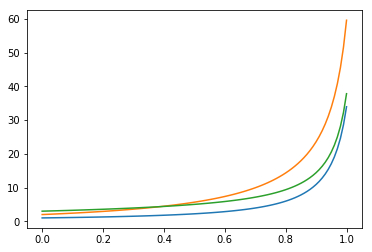

In [53]:
# this is the function of the right hand side of the ODE

def rhs(c,t,A,B):  
    return A.dot(c) +(B.dot(c)).dot(c)

# Now we set up the inital time range, and initial values for coefficients c1, c2, c3
t_arr=np.linspace(0,1,101)
c_init =[1,2,3]

# Here is the call to the ODE solver (it is really that simple)
c_arr=odeint(rhs,c_init,t_arr, args=(A,B,))

# now we split out the 3 variables c1,c2,c3 and plot thsm. 
c1,c2,c3 = c_arr[:,0],c_arr[:,1],c_arr[:,2]
plt.ion()
plt.plot(t_arr,c1,t_arr,c2,t_arr,c3)

Well,it looks like it works!

Next step is to try with the many coeffcients of the problem.